In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('stores_geo.csv', index_col = 0)

In [60]:
df.shape

(2114, 6)

In [31]:
df.dropna(inplace= True)

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
work_df = pd.DataFrame()
work_df['long'] = df['longitude']
work_df['lat'] = df['latitude']

In [18]:
work_df.dropna(inplace = True)

In [23]:
factors = np.arange(2, 21)

sil = []

for i in factors:
    km = KMeans(n_clusters = i).fit(work_df)
    sil.append(silhouette_score(work_df, km.labels_))

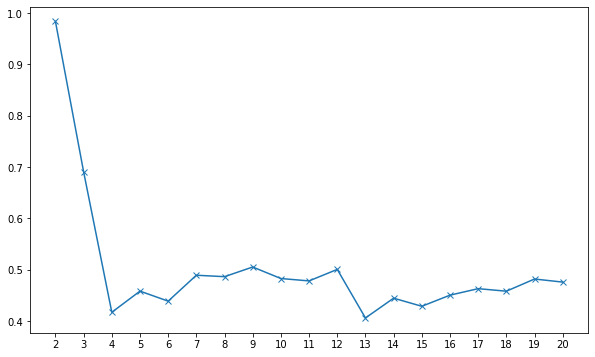

In [24]:
# Sihouette
plt.figure(figsize=(10,6))
plt.plot(factors, sil, marker = 'x')
plt.xticks(factors)
plt.show()

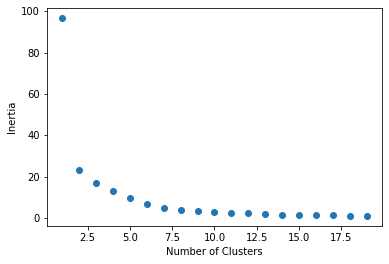

In [25]:
k_range = np.arange(1,20)

inertia_list = []

for k in k_range :
    
    #Specify the model
    k_means_model = KMeans(n_clusters = k)
    k_means_model.fit(work_df)
    
    inertia_list.append(k_means_model.inertia_)
    
plt.figure()
plt.scatter(k_range,inertia_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

In [75]:
km = KMeans(n_clusters = 20, random_state=1).fit(work_df)

In [76]:
df['cluster'] = km.labels_

In [19]:
#Specify the model
km = KMeans(n_clusters = 4)
#Fit the model to the data
km.fit(work_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
km.labels_

array([1, 1, 2, ..., 0, 0, 0])

In [28]:
work_df

,long,lat,cluster
0,-73.6961,45.4752,1
1,-73.5550,45.5057,1
2,-79.2686,43.8769,0
3,-79.3644,43.7124,0
4,-79.5210,43.7568,0
...,...,...,...
2110,-79.4111,43.7673,0
2111,-79.4111,43.7673,0
2112,-79.4928,43.7319,0
2113,-79.3853,43.6899,0


In [33]:
df.to_csv('stores_geo.csv')

In [34]:
df['cluster'].value_counts()

0    2112
1       2
Name: cluster, dtype: int64

In [54]:
df2 = pd.read_csv('clean_sb_version1.csv')
df2.dropna(inplace=True)

In [56]:
df2.isna().sum()

Unnamed: 0        0
store_name        0
street_address    0
postal_code       0
dtype: int64

In [82]:
df2['lat'] = df['latitude']

In [83]:
df2['long'] = df['longitude']

In [92]:
df2.to_csv('clean_sb_final2.csv')

In [35]:
from sklearn.cluster import DBSCAN

In [86]:
coords = pd.DataFrame()
coords['long'] = df['longitude']
coords['lat'] = df['latitude']

In [87]:
db = DBSCAN(eps=1, min_samples=2).fit(coords)
# factors = np.arange(2, 21)
silhouette_score(work_df, db.labels_)

0.954935185005012

In [88]:
len(db.labels_)

2114

In [57]:
df2.dropna(inplace=True)

In [58]:
df2.shape

(2115, 4)

In [89]:
df2['cluster'] = db.labels_

In [79]:
df2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [93]:
df2

,store_name,street_address,postal_code,cluster,lat,long
0,Harry Rosen Inc.,218 Yonge Blvd,M5M 3H8,0,45.4752,-73.6961
1,Despina Kirk Assets,113 Brock Street North,L1M 4H3,0,45.5057,-73.5550
2,Lady Ann Superstore African Boutique,1758 Eglinton Ave West,M6E 2H6,1,43.8769,-79.2686
3,Precious Cuts,2900 Jane St,M3N 2J7,1,43.7124,-79.3644
4,Extoggery Store,10 Brentcliffe Road,M4G 3Y2,1,43.7568,-79.5210
...,...,...,...,...,...,...
2109,Garage Clothing Co The Holt Renfrew &amp; Co L...,326 Sheppard Ave E,M2N 3B4,1,43.7535,-79.4472
2110,Bayview Village Fashion Outlet,326 Sheppard Ave E,M2N 3B4,1,43.7673,-79.4111
2111,Godsway Clothing Inc,2111 Jane St,M3M 1A2,1,43.7673,-79.4111
2112,Rococo,22,M4T 2S3,1,43.7319,-79.4928


In [70]:
bdf2.loc[1605,:]

Unnamed: 0                  1605
store_name        AOneBeauty.com
street_address           Toronto
postal_code              X1X 1X1
Name: 1605, dtype: object

In [71]:
df2.drop([1605], inplace = True)

In [72]:
df2.reset_index(drop=True, inplace = True)